In [1]:
import numpy as np
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from keras import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.models import * 
from tensorflow.keras.preprocessing import image

In [2]:
# client 1
import glob,os,cv2
elbow_negative=glob.glob('./archive/finaldata/train_final/XR_ELBOW//negative/*.png')
elbow_positive=glob.glob('./archive/finaldata/train_final/XR_ELBOW/positive/*.png')

elbow_negative_t=glob.glob('./archive/finaldata/valid_final/XR_ELBOW/negative/*.png')
elbow_positive_t=glob.glob('./archive/finaldata/valid_final/XR_ELBOW/positive/*.png')

In [4]:
data=[]
label=[]
ii=0
for i in elbow_negative:
    while(ii<1500):
        a=cv2.imread(i,1)
        a=cv2.resize(a,(64,64))
        data.append(a)
        label.append(0)
        ii=ii+1
for i in elbow_positive:
    a=cv2.imread(i,1)
    a=cv2.resize(a,(64,64))
    data.append(a)
    label.append(1)
for i in elbow_negative_t:
        a=cv2.imread(i,1)
        a=cv2.resize(a,(64,64))
        data.append(a)
        label.append(0)
for i in elbow_positive_t:
    a=cv2.imread(i,1)
    a=cv2.resize(a,(64,64))
    data.append(a)
    label.append(1)

In [5]:
data=np.array(data)
label=np.array(label)

In [6]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(data,label,stratify=label,test_size=0.2)

In [7]:
base_model = tf.keras.applications.EfficientNetB3(weights='imagenet', input_shape=(64,64,3), include_top=False)

for layer in base_model.layers:
    layer.trainable=False
model = Sequential()
model.add(base_model)
model.add(GaussianNoise(0.25))
model.add(GlobalAveragePooling2D())
model.add(Dense(512,activation='relu'))
model.add(BatchNormalization())
model.add(GaussianNoise(0.25))
model.add(Dropout(0.25))
model.add(Dense(64,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.15))
model.add(Dense(1, activation='sigmoid'))
model.summary()
#  ------------------------------------------------------------------------------

# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# model = Sequential()

# model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
# model.add(MaxPooling2D((2, 2)))

# model.add(Conv2D(64, (3, 3), activation='relu'))
# model.add(MaxPooling2D((2, 2)))

# model.add(Flatten())

# model.add(Dense(64, activation='relu'))
# model.add(Dropout(0.5))

# model.add(Dense(1, activation='sigmoid'))

# model.summary()



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ efficientnetb3 (Functional)          │ ?                           │      10,783,535 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gaussian_noise (GaussianNoise)       │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ ?                           │     0 (unbuilt) │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ ?                           │     0 (unbuilt) │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gaussian_noise_1 (GaussianNoise)     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ ?                           │     0 (unbuilt) │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,783,535 (41.14 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 10,783,535 (41.14 MB)

In [8]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy','Precision','Recall','AUC'])

In [9]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
lrp=ReduceLROnPlateau(monitor="val_loss", factor=0.1, patience=2)
filepath='stage-2_model.keras'
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
call=[checkpoint,lrp]
history = model.fit(
    x_train,y_train,
    epochs=10,
    validation_data=(x_test,y_test),
    steps_per_epoch= 10,
    callbacks=call
    )

Epoch 1/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - AUC: 0.8384 - Precision: 0.7863 - Recall: 0.8153 - accuracy: 0.7797 - loss: 0.5089
Epoch 1: val_accuracy improved from -inf to 0.83145, saving model to stage-2_model.keras
10/10 ━━━━━━━━━━━━━━━━━━━━ 87s 4s/step - AUC: 0.8455 - Precision: 0.7933 - Recall: 0.8233 - accuracy: 0.7874 - loss: 0.4952 - val_AUC: 0.9379 - val_Precision: 0.9089 - val_Recall: 0.7790 - val_accuracy: 0.8314 - val_loss: 0.3684 - learning_rate: 0.0010
Epoch 2/10


D:\anaconda3\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)



Epoch 2: val_accuracy did not improve from 0.83145
10/10 ━━━━━━━━━━━━━━━━━━━━ 8s 806ms/step - AUC: 0.0000e+00 - Precision: 0.0000e+00 - Recall: 0.0000e+00 - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_AUC: 0.9379 - val_Precision: 0.9089 - val_Recall: 0.7790 - val_accuracy: 0.8314 - val_loss: 0.3684 - learning_rate: 0.0010
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - AUC: 0.9422 - Precision: 0.9065 - Recall: 0.9761 - accuracy: 0.9279 - loss: 0.2346
Epoch 3: val_accuracy improved from 0.83145 to 0.91321, saving model to stage-2_model.keras
10/10 ━━━━━━━━━━━━━━━━━━━━ 26s 3s/step - AUC: 0.9425 - Precision: 0.9062 - Recall: 0.9768 - accuracy: 0.9282 - loss: 0.2338 - val_AUC: 0.9386 - val_Precision: 0.9147 - val_Recall: 0.9330 - val_accuracy: 0.9132 - val_loss: 0.2855 - learning_rate: 0.0010
Epoch 4/10

Epoch 4: val_accuracy did not improve from 0.91321
10/10 ━━━━━━━━━━━━━━━━━━━━ 7s 745ms/step - AUC: 0.0000e+00 - Precision: 0.0000e+00 - Recall: 0.0000e+00 - accuracy: 0.0000e+00 - lo

In [10]:
model.evaluate(x_train,y_train)

100/100 ━━━━━━━━━━━━━━━━━━━━ 30s 297ms/step - AUC: 0.9663 - Precision: 0.9035 - Recall: 0.9851 - accuracy: 0.9317 - loss: 0.2039


[0.20414961874485016,
 0.9332493543624878,
 0.9036885499954224,
 0.9865771532058716,
 0.9671087861061096]

In [11]:
model.evaluate(x_test,y_test)

25/25 ━━━━━━━━━━━━━━━━━━━━ 8s 304ms/step - AUC: 0.9521 - Precision: 0.8996 - Recall: 0.9734 - accuracy: 0.9264 - loss: 0.2188


[0.21077470481395721,
 0.9371069073677063,
 0.9145833253860474,
 0.9799107313156128,
 0.9531282186508179]

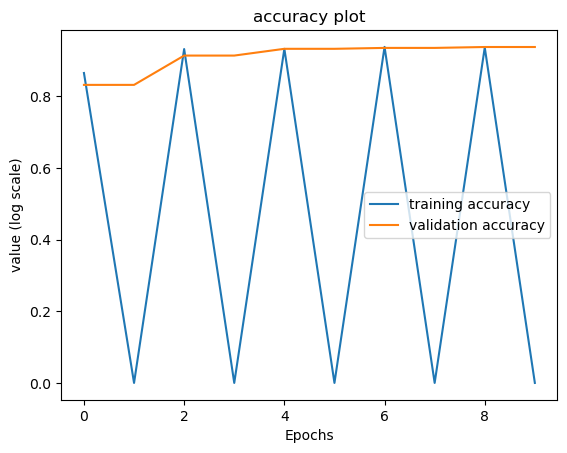

In [12]:
import matplotlib.pyplot as plt
plt.title('accuracy plot')
plt.plot(history.history['accuracy'],label='training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel("Epochs")
plt.ylabel("value (log scale)")
plt.legend();

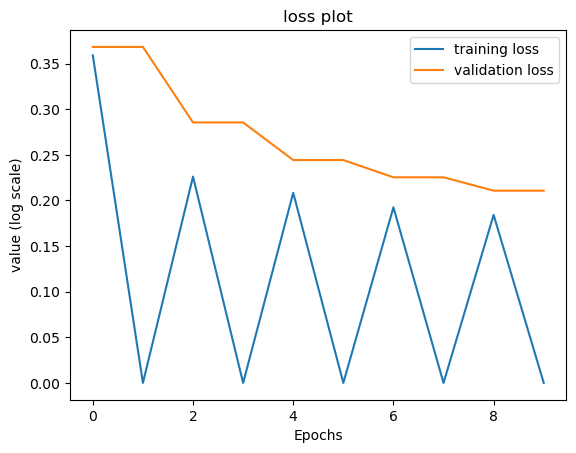

In [13]:
plt.title('loss plot')
plt.plot(history.history['loss'],label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel("Epochs")
plt.ylabel("value (log scale)")
plt.legend();

In [14]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
train=model.predict(x_train)
val=model.predict(x_test)
train=train>=0.5
val=val>=0.5
print(classification_report(val,y_test))

100/100 ━━━━━━━━━━━━━━━━━━━━ 48s 394ms/step
25/25 ━━━━━━━━━━━━━━━━━━━━ 7s 269ms/step
              precision    recall  f1-score   support

       False       0.88      0.97      0.92       315
        True       0.98      0.91      0.95       480

    accuracy                           0.94       795
   macro avg       0.93      0.94      0.94       795
weighted avg       0.94      0.94      0.94       795



In [15]:
from keras.models import load_model

# Assuming you have already created and trained your Keras model
# Replace 'model' with the name of your trained model
model.save('model3.keras')  # Save the entire model to a HDF5 file
# model.save('model1.h5')  # Save the entire model to a HDF5 file

# To load the saved model later
loaded_model = load_model('model3.keras')
loaded_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ efficientnetb3 (Functional)          │ (None, 2, 2, 1536)          │      10,783,535 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gaussian_noise (GaussianNoise)       │ (None, 2, 2, 1536)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 1536)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │         786,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gaussian_noise_1 (GaussianNoise)     │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │          32,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13,247,668 (50.54 MB)

 Trainable params: 820,993 (3.13 MB)

 Non-trainable params: 10,784,687 (41.14 MB)

 Optimizer params: 1,641,988 (6.26 MB)